## Types of Clustering Algorithms

There are various types of clustering algorithms, each suited for different types of data and tasks. In this notebook, we will explore the most commonly used clustering techniques, understand their working principles, and discuss their pros and cons. We'll also implement some of them using Python.

---

## Table of Contents:

1. [Partitioning Clustering](#1-partitioning-clustering)
    - K-Means Clustering
2. [Hierarchical Clustering](#2-hierarchical-clustering)
    - Agglomerative Clustering
3. [Density-Based Clustering](#3-density-based-clustering)
    - DBSCAN Clustering
4. [Evaluating Different Clustering Algorithms](#4-evaluating-different-clustering-algorithms)

---

## 1. Partitioning Clustering

Partitioning methods divide data points into non-overlapping clusters such that each data point belongs to exactly one cluster.

### K-Means Clustering
K-Means is the most widely used partitioning clustering algorithm. It partitions the data into `k` clusters by minimizing the variance within each cluster.

#### How K-Means Works:
1. **Initialization**: Select `k` initial centroids randomly.
2. **Assignment**: Assign each point to the nearest centroid.
3. **Update**: Recalculate the centroids based on the current cluster assignments.
4. **Repeat**: Repeat the process until the centroids no longer move.

#### Advantages:
- Simple and efficient for well-separated clusters.
- Scales well to large datasets.

#### Disadvantages:
- Requires specifying the number of clusters.
- Sensitive to initial centroid selection.


In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
X,_ = make_blobs(centers=4)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

c:\Users\Gökdeniz\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

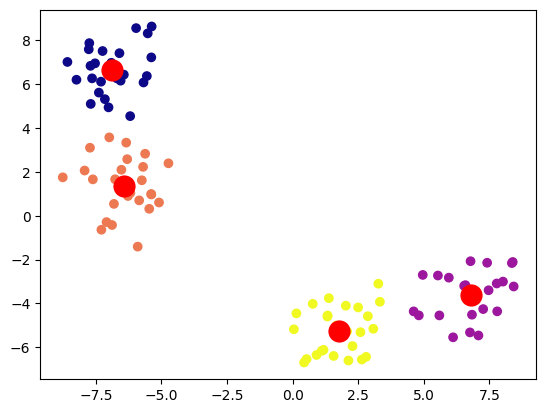

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="red",linewidths=10)
plt.show()

## 2. Hierarchical Clustering
Hierarchical clustering builds a hierarchy of clusters by either:

- Agglomerative (Bottom-Up): Starts with each point as its own cluster and merges them iteratively.
- Divisive (Top-Down): Starts with all points in one cluster and splits them iteratively.

### Agglomerative Clustering
Agglomerative clustering begins with individual points as separate clusters and merges the closest pairs based on a distance metric (e.g., Euclidean distance).

### Key Concepts:
- Linkage Criteria: Determines which clusters to merge (single, complete, average linkage).
- Dendrogram: A tree-like diagram that shows the sequence of merges.

### Advantages:
- No need to specify the number of clusters in advance.
- Produces a dendrogram, allowing flexibility in selecting the final number of clusters.

### Disadvantages:
- Computationally expensive for large datasets.

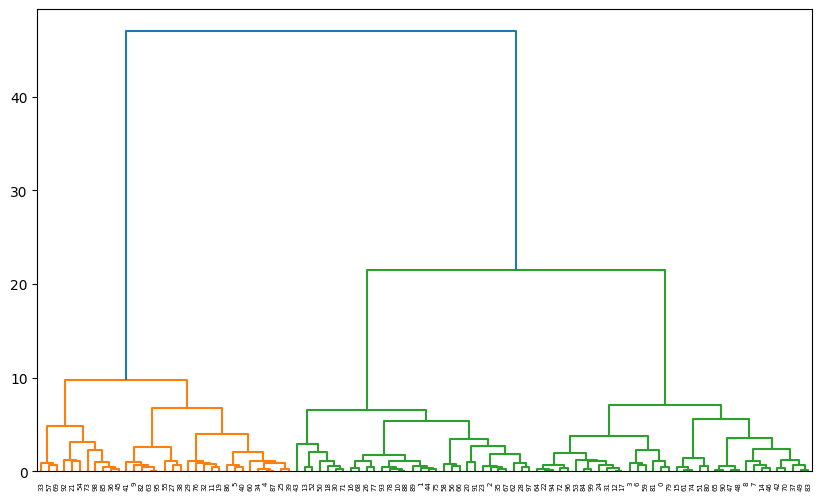

In [6]:
from scipy.cluster.hierarchy import dendrogram,linkage

X,_ = make_blobs(centers=3)
Z = linkage(X,"ward")

plt.figure(figsize=(10,6))
dendrogram(Z)
plt.show()

## 3. Density-Based Clustering
Density-based clustering groups points that are close to each other based on density and separates regions of low density.

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
DBSCAN identifies core points based on two parameters: eps (maximum distance between points) and min_samples (minimum number of points to form a cluster).

### How DBSCAN Works:
- Core Points: Points that have at least min_samples neighbors within distance eps.
- Border Points: Points that are within eps distance of a core point but have fewer than min_samples neighbors.
- Noise Points: Points that are neither core nor border points.
### Advantages:
- Can find arbitrarily shaped clusters.
- Automatically detects noise and outliers.
- No need to specify the number of clusters.
### Disadvantages:
- Sensitive to the choice of eps and min_samples parameters.

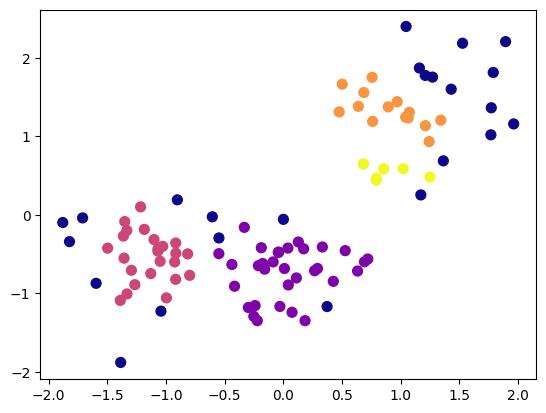

In [10]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan.labels_, s=50, cmap="plasma")
plt.show()

## 4. Evaluating Different Clustering Algorithms
Clustering evaluation can be challenging since there are no predefined labels in most cases. Common evaluation methods include:

### Silhouette Score:
The silhouette score measures how similar a point is to its own cluster compared to other clusters.

In [11]:
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score for K-Means: {kmeans_silhouette:.2f}")

dbscan_silhouette = silhouette_score(X_scaled, dbscan.labels_)
print(f"Silhouette Score for DBSCAN: {dbscan_silhouette:.2f}")

Silhouette Score for K-Means: -0.07
Silhouette Score for DBSCAN: 0.26


### Key Evaluation Metrics:
- Silhouette Score: Measures the compactness of clusters.
- Inertia (Sum of Squared Errors): For K-Means, measures how tightly points are clustered around centroids.
- Rand Index: Compares the similarity between true labels and predicted labels if available.